In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("../") # Enables importing from parent directory
from fpl_draft_league import charts
from fpl_draft_league import utils
from fpl_draft_league import fpl_draft_league as fpl
import matplotlib.pyplot as plt

## Standings

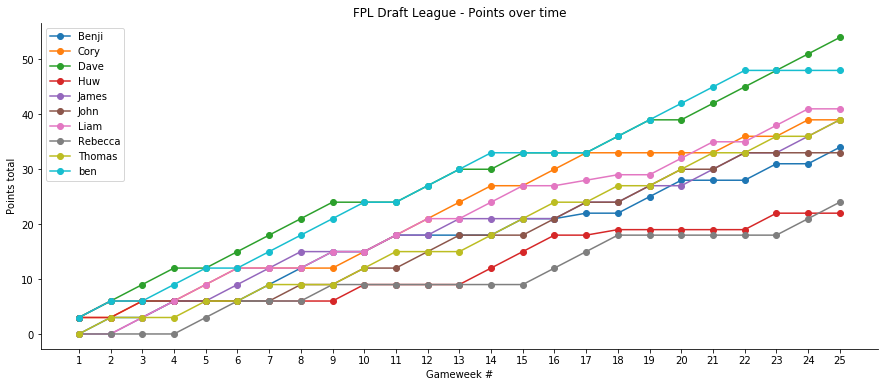

In [40]:
charts.chart_league_standings_history()

## Top 10 Players

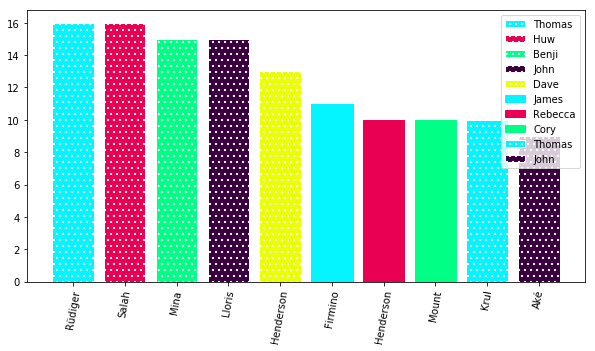

In [41]:
charts.chart_top_n_players(10)

## Streaks

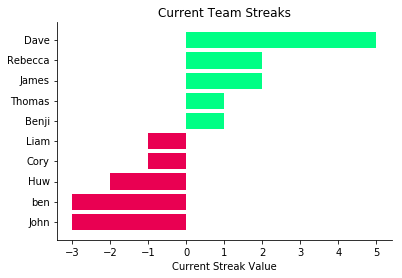

In [39]:
charts.chart_current_streaks()